# Linear Regression with Synthetic Data

## Boilerplate

In [13]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

def build_model(learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1, )))
    model.compile(
        optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
        loss="mean_squared_error",
    )
    return model

def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(
        batch_size=batch_size,
        epochs=epochs,
        x=feature,
        y=label,
    )

    weight = model.get_weights()[0]
    bias = model.get_weights()[1]
    epochs = history.epoch

    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return weight, bias, epochs, rmse

def plot_model(weight, bias, feature, label):
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.scatter(feature, label)

    x0 = 0
    x1 = feature[-1]

    y0 = bias
    y1 = y0 + weight * x1

    plt.plot([x0, x1], [y0, y1], c='r')
    plt.show()

def plot_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min() * 0.97, rmse.max()])

    plt.show()

## Setup

Our dataset will consist of 12 examples. Each example consists of one feature
and one label.

In [14]:
feature = [1.0, 2.0, 3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0]
label   = [5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2]

Next, we need to define our hyperparameters (learning rate, epochs, and batch
size).

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 731.2081 - root_mean_squared_error: 27.0409
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 459.6635 - root_mean_squared_error: 21.4398
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 295.2674 - root_mean_squared_error: 17.1833
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 177.4276 - root_mean_squared_error: 13.3202
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 94.4036 - root_mean_squared_error: 9.7161
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 40.8526 - root_mean_squared_error: 6.3916
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 13.8753 - root_mean_squared_error: 3.7250
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 3.8390 - root_mean_squared_error: 1.9593
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 

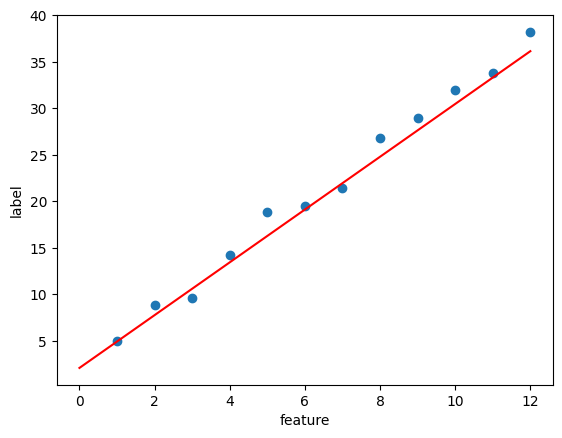

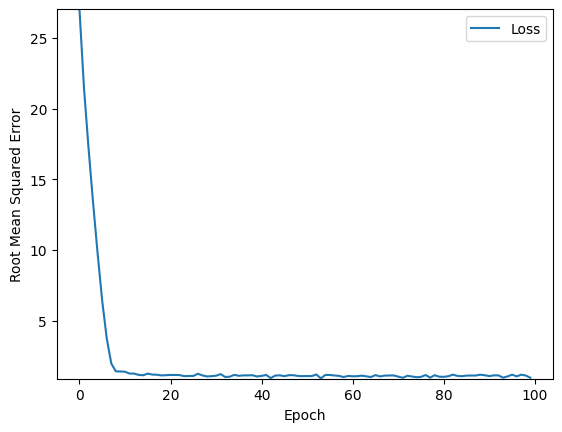

In [27]:
learning_rate = 0.0625
epochs = 100
batch_size = 1

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, feature, label, epochs, batch_size)

plot_model(weight, bias, feature, label)
plot_loss_curve(epochs, rmse)

Most machine learning problems require a lot of hyperparameter tuning.
Unfortunately, we can't provide concrete tuning rules for every model. Lowering
the learning rate can help one model converge efficiently but make another model
converge much too slowly. You must experiement to find the best set of
hyperparameters for your dataset. That said, here are a few rules of thumb:

- Training loss should steadily decrease, steeply at first, and then more and
  more slowly until the slope of the curve reaches or approaches zero.
- If the training loss does not converge, train for more epochs.
- If the training loss decreases too slowly, increase the learning rate. Note
  that setting the learning rate too high may also prevent training loss from
  converging.
- If the training loss begins to oscillate, decrease the learning rate.
- Lowering the learning rate while increasing the number of epochs or the batch
  size is often a good combination
- Setting the batch size to a _very_ small number can also cause instability.
  First, try large batch size values. Then, decrease the batch size until you
  see degradation.
- For real-world datasets consisting of a very large number of examples, the
  entire dataset might not fit into memory. In such cases, you'll need to reduce
  the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you
must always experiment and verify.